# Hydrodynamic Limits

**Author:** Nazim Fadli  
**Based on:** "Introduction aux limites hydrodynamiques" by M. Simon, Lectures Sophie Kowalevski, Angers 2024

I had the opportunity to attend a lecture and I found it very interesting. So I decided to simulate some of the results presented in the lecture. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

1. [Introduction](#Introduction)
2. [Simple Random Walk in one dim](#Simple-Random-Walk-1D)
    - Definitions
    - Simulation
3. [Random Walk on the Torus](#simple-random-walk-torus)
    - Definitions
    - Simulation
4. [Multiple Independent Random Walks On the torus](#Multiple-Random-Walks)
    - Model Definition
    - Equilibrium States
    - Simulation
5. [Hydrodynamic limits](#Hydrodynamic-eq)
    - Local Equilibrium
    - Hydrodynamic Equations
6. [References](#References)


## Introduction

In this notebook, I will simulate a simple particle system, where each particle performs an independent random walk. then i will compare the results with the hydrodynamic limit of the system. the goal of hydrodynamic limits is to describe the evolution of a macroscopic quantity of a particle system, given the microscopic dynamics of the particles.

## Simple Random Walk (1D)

A simple random walk on $\mathbb{Z}$ in discrete time:

1. Let $S_0 \in \mathbb{Z}$ be distributed according to some initial probability $\nu_0$ on $\mathbb{Z}$.
2. Consider a sequence of i.i.d. random variables $(\varepsilon_k)_{k \in \mathbb{N}}$ where each $\varepsilon_k$ takes values in $\{-1, 1\}$.
3. For any $k \in \mathbb{N}$, define the random walk as follows:
$$ {\mathsf{S}}{t+1}={\mathsf{S}}{t}+\varepsilon_{t+1},\qquad\mathrm{therefore}\quad{\mathsf{S}}{t}={\mathsf{S}}{0}+\sum_{k=1}^{t}\varepsilon_{k},\qquad t\in\mathbb{N}. $$

This simple random walk is a stochastic process that evolves over time according to the given rules.

- $\varepsilon_k$ takes values in $\{-1, 1\}$ for any $k \in \mathbb{N}$.
- Let $p \in [0, 1]$ such that:
  $$
  \mathbb{P}[\varepsilon_k = 1] = p, \quad \mathbb{P}[\varepsilon_k = -1] = 1 - p, \quad \text{for any} \ k \in \mathbb{N}.
  $$




In [56]:
# Parameters
p = 0.5  
t = 2 * 10**3
num_simulations = 3

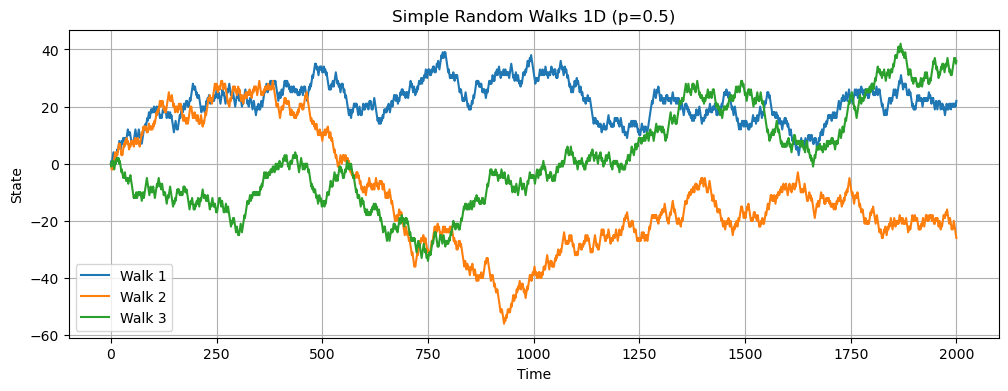

In [58]:
# Function to simulate a single random walk
def simulate_random_walk(p, t, S0=0):
    steps = np.random.choice([-1, 1], size=t, p=[1-p, p])
    S = np.cumsum(steps)
    S = S + S0
    S = np.insert(S, 0, S0)
    return S


# Simulate multiple random walks
plt.figure(figsize=(12, 4))
for i in range(num_simulations):
    walk = simulate_random_walk(p, t, 0)
    plt.plot(walk, label=f'Walk {i+1}')

plt.title('Simple Random Walks 1D (p=0.5)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()

## Simple Random Walk On the torus $\mathbb{T}_{\mathrm{N}}=\mathbb{Z}/\mathrm{N}\mathbb{Z}$  <a id="simple-random-walk-torus"></a>


Now the state space is finite since we walk on the torus (a circle with $\mathrm{N}$ points). We only have to change the definition of the random walk to make it work on the torus.

$$
{\bf S}_{t}=\left({\bf S}_{0}+\sum_{k=1}^{t}\varepsilon_{k}\right)\qquad\mathrm{mod}\ \mathrm{N}.
$$  

Transition Probabilities:

For any $x$ $,y\in\mathbb{T}_{\mathrm{N}},$ we are moving on a circle of N points :


$$
\mathbf{Q}_{x,y} =
\begin{cases}
p & \text{if } y = (x + 1) \mod N, \\
1 - p & \text{if } y = (x - 1) \mod N, \\
0 & \text{otherwise}.
\end{cases}
$$

The process is time-homogeneous, for any $\mathbf{t}, s\in\mathbb{N}$ and $x,y\in\mathbb{T}_{\mathrm{N}}$ :


$$
\mathbf{Q}_{x,y}:=\mathbb{P}\big(\mathbf{S}_{t+1}=y~\big|~\mathbf{S}_{t}=x\big)=\mathbb{P}\big(\mathbf{S}_{1}=y-x|\mathbf{S}_{0}=0\big),
$$  

So, we have :

$$
\mathbb{P}\big(\boldsymbol{S}_{t+s}=\boldsymbol{y}\mid\boldsymbol{S}_{s}=\boldsymbol{x}\big)=(\mathbf{Q}^{t})_{x,y}=(\mathbf{Q}^{t})_{0,y-x}=\mathbb{P}\big(\boldsymbol{S}_{t}=\boldsymbol{y}-\boldsymbol{x}\lvert\boldsymbol{S}_{0}=0\big).
$$  


#### Illustration of the random walk on the torus:

<img src="./assets/Random_walk_Tn.jpg" width="200" height="200" style="display: block; margin-left: auto; margin-right: auto;" />

In [98]:
# Parameters
p = 0.5  
t = 20
N = 10
num_simulations = 2

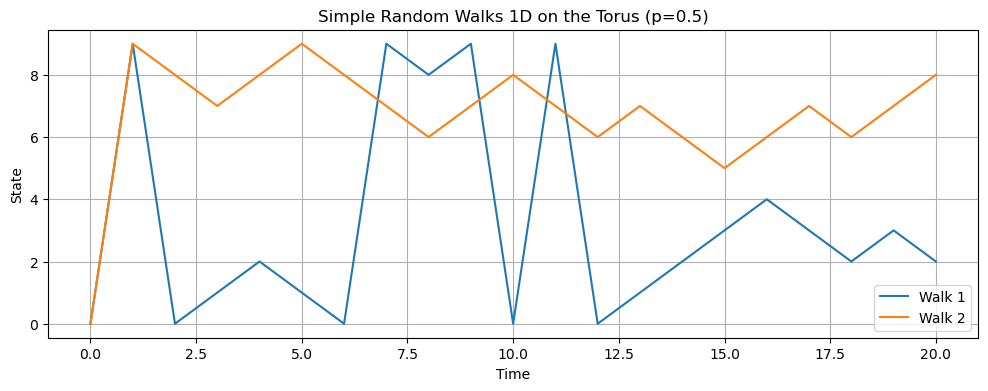

In [101]:
# Function to simulate a single random walk on the torus
def simulate_random_walk_torus(p, t, S0=0, N=10):
    S = simulate_random_walk(p, t, S0) % N
    return S

# Simulate multiple random walks on the torus
plt.figure(figsize=(12, 4))
for i in range(num_simulations):
    walk = simulate_random_walk_torus(p, t, 0, N)
    plt.plot(walk, label=f'Walk {i+1}')

plt.title('Simple Random Walks 1D on the Torus (p=0.5)')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()

    


## Multiple Independent Random Walks On the torus $\mathbb{T}_{\mathrm{N}}$ <a id="Multiple-Random-Walks"></a>

Now we will define a simple particle system where each particle performs an independent random walk on the torus $\mathbb{T}_{\mathrm{N}}$. 

here the particules evolve independently, so there is no interaction between them, which is an important assumption that is not always true in real systems (for example, we could imagine that particules can't be at the same place at the same time).

We first introduce some notations:

1. Let $K$ denote the total number of particles at time $0$.
2. Take $x_1, \ldots, x_K \in \mathbb{Z}$ which correspond to their initial positions.
3. Let $\{\varepsilon_{n}^{i}\}_{i=1, \ldots, K}$ be $K$ independent copies of sequences of i.i.d. random variables such that i is the particle index and n is the time index :
$$
\mathbb{P}(\varepsilon_{n}^{i} = 1) = p, \quad \mathbb{P}(\varepsilon_{n}^{i} = -1) = 1 - p.
$$


We define for any $ t \in \mathbb{N} $ and any $ i \in \{1, \ldots, K\} $:

$$
\mathbf{X}_t^i = (x_i + \sum_{n=1}^t \varepsilon_{n}^i) \mod N,
$$

which represents the position at time $ t $ of the $ i $-th particle on the torus. For any $ i $, the sequence $ (\mathbf{X}_t^i)_{t \in \mathbb{N}} $ is a simple random walk on the torus $ \mathbb{T}_N $ starting at $ (x_i \mod N) $ with transition matrix $ Q $.


#### Illustration of the model:

<img src="./assets/MRwalk.jpg" width="400" height="200" style="display: block; margin-left: auto; margin-right: auto;" />

We are interested in the evolution of the density of particles at each position on the torus (Macroscopic quantity), we are not interested in the individual position of each particle (Microscopic quantity).

For a site $ x \in \mathbb{T}_N $, we denote by $ \eta_t(x) $ the number of particles at site $ x $ at time $t$ :

$$
\eta_t(x) = \sum_{i=1}^K \mathbf{1} \{ \mathbf{X}_t^i = x \}, \quad x \in \mathbb{T}_N.
$$

We denote a configuration of the system at time $ t $ by $ \eta_t =$ { ${\eta_t(x)}$ : $ x \in \mathbb{T}_N $} $ \in \mathbb{N}^{\mathbb{T}_N} $ the configuration space of the system. ( $\mathbb{N}$ is the set of natural numbers).

- K is the total number of particles at time 0. And we can set it as fixed or as a random variable. That can be computed from $\eta_0$ which is the initial configuration of the system distributed according to some initial probability $\mu_0$ on $\mathbb{N}^{\mathbb{T}_N}$.

$$
\mathrm{K}=\sum_{x\in\mathbb{T}_{\mathrm{N}}}\eta_{0}(x).
$$  

Then, for any $t\in\mathbb{N}$ and $x\in\mathbb{T}_{\mathrm{N}}$ we have the representation  

$$
\eta_{t}(x)=\sum_{y\in\mathbb{T}_{\mathbb{N}}}\sum_{i=1}^{\eta_{0}(y)}\mathbf{1}\{\mathrm{X}_{t}^{i,y}=x\},
$$  

- $\mathrm{X}_{t}^{i,y}$ : Position at time $t$ of the i-th particle that started at site $y$

### Equilibrium States

An equilibrium state is a probability measure $ \mu $ on $ \mathbb{N}^{\mathbb{T}_N} $ (Invariant Measure) such that :

if $ \eta_0 \sim \mu $ then $ \eta_t \sim \mu $ for any $ t \in \mathbb{N} $.


from the Poisson distribution $ \mathrm{Poisson}(\lambda) $, we can define the product measure $ \nu_{\rho}^{N} $ on $ \mathbb{N}^{\mathbb{T}_N} $ for a given positive function $ \rho : \mathbb{T}_N \to \mathbb{R} $ :

$$
\nu_{\rho(.)}^{N} = \bigotimes_{x\in\mathbb{T}_{\mathrm{N}}}\mathcal{P}_{\rho(x)}.
$$

where $ \mathcal{P}_{\rho(x)} $ is the Poisson distribution with parameter $ \rho(x) $.

1 - $ \forall x \in \mathbb{T}_N $, $ \eta(x) $ is a Poisson random variable with parameter $ \rho(x) $.

2 - $ \forall x, y \in \mathbb{T}_N $, $ \eta(x) $ and $ \eta(y) $ are independent for any $ x \neq y $.

- We can show that if $ \rho $ is a constant function equal to $\alpha$, then $ \nu_{\alpha}^{N} $ is an equilibrium state for the system.

the idea behind the proof is to show that the Laplace transform of $ \eta_t $ for any $ t \in \mathbb{N}$ is the same as the Laplace transform of $ \eta_0 $ under the measure $ \nu_{\alpha}^{N} $. 

In [20]:
# Parameters
p = 0.5  
t = 2
N = 4
num_simulations = 10000
alpha = 3

In [21]:
# set eta_0 number of particles at each site according to P(alpha)
eta_0 = np.random.poisson(lam=alpha, size=N) # 1xN array


# here we get k, the total number of particles in the system
num_particles = eta_0.sum() 


# here we will represent a configuration of the system as a list of the positions of the particles, the len of this list is k
particles_0 = np.repeat(np.arange(N), eta_0) # 1xk array


# simulate the evolution of the system
def simulate_particles(particles_t, p, t, N):
    '''
    you give an initial configuration of the system and the function will simulate the evolution of the system for t time steps.

    So you will get the configuration of the system at time t.

    '''
    
    for _ in range(t):
        steps = np.random.choice([-1, 1], size=len(particles_t), p=[1-p, p]) # 1xk array of -1 and 1

        particles_t = (particles_t + steps) % N # 1xk array
    
    return particles_t


# Simulate the evolution of the system and keep track of the configuration at each time step
def simulate_system(particles_0,p, t, N):
    '''ArithmeticError
    you give an initial configuration of the system and the function will simulate the evolution of the system for t time steps.

    So you will get the configuration of the system at each time step. 

    it could be done in the first function but I wanted to separate the two functions to make it more clear.
    even though i am making a lot of copies.
    
    '''
    particles_t = particles_0.copy()
    particles_t_list = [particles_t.copy()]
    for _ in range(t):
        particles_t = simulate_particles(particles_t, p, 1, N)
        particles_t_list.append(particles_t.copy())
    return particles_t_list


In [22]:
system = simulate_system(particles_0, p, t, N)
system = np.array(system)

In [25]:
def plot_heatmap(system, N):
    """
    Plot a heatmap of particle counts at each site over time.
    
    """
    t_steps = len(system)
    occupancy = np.zeros((t_steps, N), dtype=int)
    
    for t, particles in enumerate(system):
        counts = np.bincount(particles, minlength=N)
        occupancy[t] = counts
    

    plt.figure(figsize=(12, 6))
    plt.imshow(occupancy , aspect='auto', cmap='bone_r',  origin='lower')
    plt.colorbar(label='Number of Particles')
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.xlabel('Site')
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.ylabel('Time Step')
    plt.title('Heatmap of Particle Occupancies Over Time')
    plt.show()


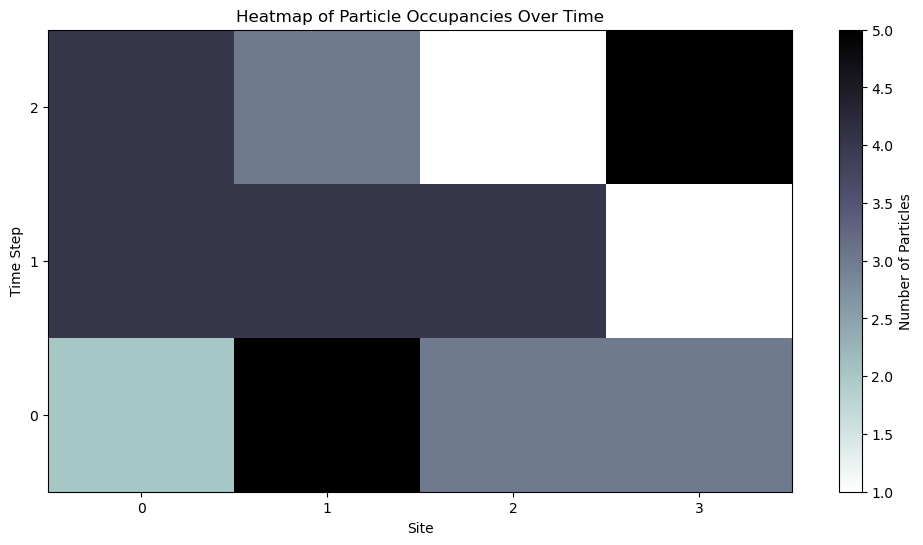

In [26]:
plot_heatmap(system, N)

## Hydrodynamic limits <a id="Hydrodynamic-eq"></a>

### Local Equilibrium

### Discrete Torus and Continuum Torus

We consider a discrete torus $\mathbb{T}_{\mathrm{N}}$ of size $ N $. One can think of $\mathbb{T}_{\mathrm{N}}$ as the set of integers $\{0, 1, \ldots, N-1\}$ arranged in a circle.

We also have a continuous torus $ T $, which is $\frac{R}{Z}$. One way to picture $ T $ is simply the unit interval $[0, 1)$ with the endpoints identified.

Embedding the Discrete Torus into the Continuous Torus :

Given a real number $ N $, a point $ u \in T $ corresponds to an integer site $ x = [uN] \in \{0, 1, \ldots, N-1\} = \mathbb{T}_{\mathrm{N}} $.

Conversely, given an integer site $ x \in \mathbb{T}_{\mathrm{N}} $, we can associate the macroscopic point $ u = \frac{x}{N} \in T $.

if we send $ N \to \infty $, the discrete torus $\mathbb{T}_{\mathrm{N}}$ converges to the continuous torus $ T $. (we fill the torus with more and more discrete points).

### Local Equilibrium Measure



We fix a **smooth initial density profile** $\rho_{0} : \mathbb{T} \to \mathbb{R}_{+}.$ We define the **product (independent) measure** $\nu_{\rho_{0}(\cdot)}^{\mathrm{N}}$ on $ \mathbb{N}^{\mathbb{T}_N} $.

- For each site $ x \in \mathbb{T}_{\mathrm{N}},$ we place a random number of particles $\eta(x)$ according to a **Poisson distribution** with parameter $\rho_{0}\left(\frac{x}{\mathrm{N}}\right).$

- Under $\nu_{\rho_{0}(\cdot)}^{\mathrm{N}},$ the random variables $\{\eta(x)\}_{x \in \mathbb{T}_{\mathrm{N}}}$ are **independent**,.


### “Local Equilibrium”?

- If we **“zoom in”** to a small neighborhood of a point $u \in \mathbb{T},$ that corresponds to looking around the integer site $x = \left[ u \mathrm{N} \right]$ on $\mathbb{T}_{\mathrm{N}}.$
  
- **Locally** (for large $\mathrm{N}$), the distribution of particles around $u$ looks like a Poisson measure with an **almost constant** parameter $\rho_{0}(u).$

### A More General Definition of Local Equilibrium

We say that a **probability measure** $\mu^{\mathrm{N}}$ on  $ \mathbb{N}^{\mathbb{T}_N} $ is a **local equilibrium** associated to the function $\rho_{0} : \mathbb{T} \to [0,1]$ if, for any **continuous test function** $\varphi : [0,1] \to \mathbb{R},$
$$
\lim_{\mathrm{N} \to \infty} \frac{1}{\mathrm{N}} \sum_{x \in \mathbb{T}_{\mathrm{N}}} \eta(x) \varphi\left(\frac{x}{\mathrm{N}}\right) = \int_{\mathbb{T}} \rho_{0}(u) \varphi(u) \, du
$$
**in probability**.


### Hydrodynamic Equation

We now turn to the study of the distribution of particles at later times, starting from a product measure with a slowly varying parameter.

We can show that at time $ t $, the configuration $ \eta_t $ is still distributed according to a **product Poisson measure** with a new parameter $ \psi_{\mathrm{N},t}(z) $ at each site \( z \):

$$
\eta_{t} \sim \bigotimes_{z\in\mathbb{T}_{\mathrm{N}}}\mathcal{P}_{\psi_{\mathrm{N},t}(z)}
$$

where

$$
\psi_{\mathrm{N},t}(z) := \sum_{y\in\mathbb{T}_{\mathrm{N}}}(\mathbf{Q}^{t})_{y,z}\rho_{0}\left(\frac{y}{\mathrm{N}}\right) = \mathbb{E}_{\mathrm{rw}}\left[\rho_{0}\left(u - \frac{\mathbf{Y}_{t}}{\mathrm{N}}\right)\right]
$$

and rw stands for random walk.


To derive a **hydrodynamic equation**, we analyze the behavior of $ \psi_{\mathrm{N},t}([u\mathrm{N}]) $ as $ \mathrm{N} \to \infty $, focusing on a macroscopic point $ u \in \mathbb{T} $.



#### Proposition: No Evolution for Fixed Time $ t $

- Let $ t \in \mathbb{N} $ be fixed. Then, for any $ u \in \mathbb{T} $,

  $$
  \lim_{\mathrm{N} \to \infty} \psi_{\mathrm{N},t}([u\mathrm{N}]) = \rho_{0}(u)
  $$



#### Proposition : Hyperbolic Time Scale

 we set $ m = 2p - 1 $ the average displacement of the random walk. ( $ m = 0 $ for symmetric random walk), and $ t \in \mathbb{R}_{+} $ be fixed. 

 Then in the **hyperbolic time scale** as $ [t\mathrm{N}] $, for any $ u \in \mathbb{T} $,

  $$
  \lim_{\mathrm{N} \to \infty} \psi_{\mathrm{N},[t\mathrm{N}]}([u\mathrm{N}]) = \rho_{0}(u - m t) =: \rho(t, u)
  $$

We can see that the density profile at time $ t $ and position $ u $ is given by the initial density profile $\rho_{0}$ shifted by $ m t $.

this new density profile $\rho(t, u)$ satisfies the partial differential equation:

$$
\partial_{t}\rho + m\partial_{u}\rho = 0, 
$$

this equation is called the hydrodynamic equation associated with the system.


#### Proposition : 

Assume that $ p = \frac{1}{2} $, i.e., the random walk is symmetric. Then, $ m = 0 $ and denote $ \sigma = 1 $ the variance of the elemantary displacement. Let $ t \in \mathbb{R}_{+} $ be fixed.

Then in the **diffusive time scale** as $ [t\mathrm{N}^{2}] $, for any $ u \in \mathbb{T} $,

  $$
  \lim_{\mathrm{N} \to \infty} \psi_{\mathrm{N},[t\mathrm{N}^{2}]}([u\mathrm{N}]) = \int_{\mathbb{R}} \rho_{0}(\theta) \mathbf{G}_{t}(u - \theta) \, d\theta
  $$

  where $ \mathbf{G}_{t} $ is the **Gaussian density** with variance $ t\sigma = t $.

The hydrodynamic equation in this case is the **heat equation**:

$$
\partial_{t}\rho = \sigma\partial_{u}^{2}\rho, 
$$




#### Theorem 2.13: Hydrodynamic Behaviors

- **Assumptions**:
  - Initial configuration $ \eta_{0} $ is distributed according to $ \nu_{\rho_{0}(\cdot)}^{\mathrm{N}} $.
  - $ \rho_{0} : \mathbb{T} \to \mathbb{R}_{+} $ is a smooth initial density profile.
  - $ \varphi : \mathbb{T} \to \mathbb{R} $ is a smooth test function.

- **Convergence**:

  The following convergence holds **in probability**:

  $$
  \frac{1}{\mathrm{N}} \sum_{x\in\mathbb{T}_{\mathrm{N}}} \varphi\left(\frac{x}{\mathrm{N}}\right)\eta_{t_{\mathrm{N}}}(x) \xrightarrow[\mathrm{N}\to\infty]{} \int_{\mathbb{T}} \varphi(u)\rho(t, u) \, du
  $$

  where $ \rho(t, u) $ depends on the chosen time scale $ t_{\mathrm{N}} $:



  1. **No dependence on $ N $**:
     - **Scaling**: $ t_{\mathrm{N}} = t $
     - **Limit**: $ \rho(t, u) = \rho_{0}(u) $
     - **Interpretation**: No evolution; the density profile remains unchanged.

  2. **Hyperbolic Time Scale** :
     
      - **Scaling**: $ t_{\mathrm{N}} = [t\mathrm{N}] $
     - **Hydrodynamic Equation**:
       
       $$
       \partial_{t}\rho + m\partial_{u}\rho = 0, \quad \rho(0, .) = \rho_{0}(.)
       $$
     


  3. **Diffusive Time Scale** :
     
      - **Scaling**: $ t_{\mathrm{N}} = [t\mathrm{N}^{2}] $
     
     - **Hydrodynamic Equation**:
       
       $$
       \partial_{t}\rho = \partial_{u}^{2}\rho, \quad \rho(0, .) = \rho_{0}(.)
       $$
     
